In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# similarly implemented to http://math_research.uct.ac.za/~siphelo/admin/interferometry/5_Imaging/5_2_sampling_functions_and_psfs.html
moon = mpimg.imread('Imaging_test_moon.jpg')
astropeiler = mpimg.imread('Imaging_test_astropeiler.jpg')
moon=np.rot90(moon)# rotate so pixel size matches
def go_gray(img):
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    
    #gray scale conversion
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b 
    return gray

astro = go_gray(astropeiler)
moon = go_gray(moon)
fftastro = np.fft.fftshift(np.fft.fft2(astro))
fftmoon = np.fft.fftshift(np.fft.fft2(moon))

<ipython-input-2-18fd0e883e98>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


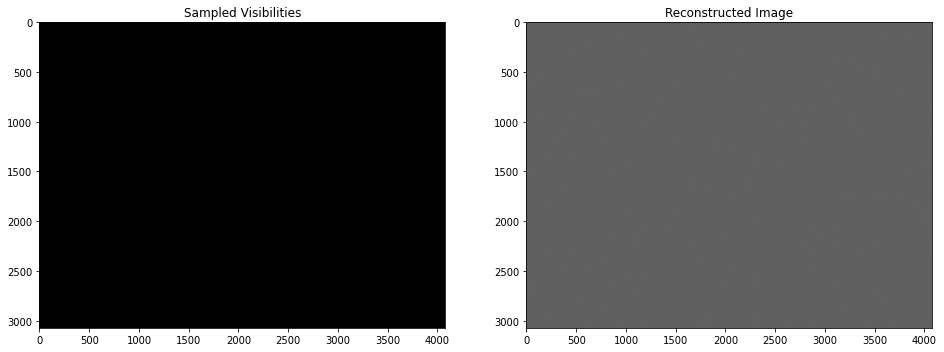

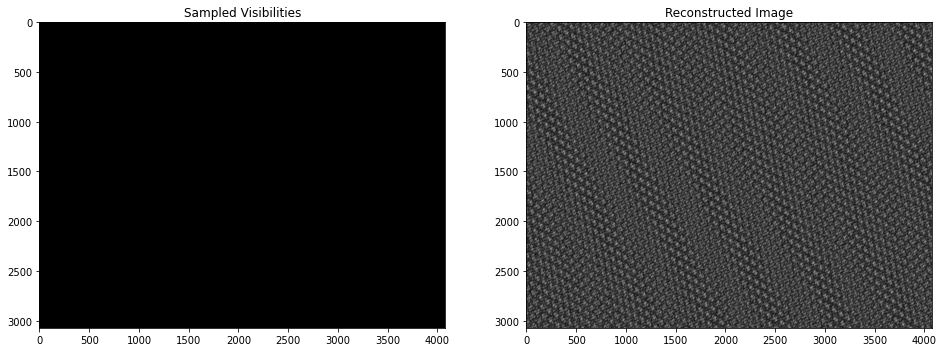

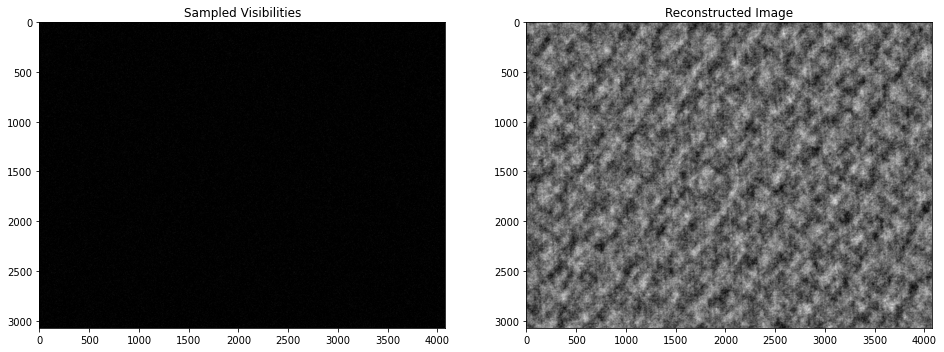

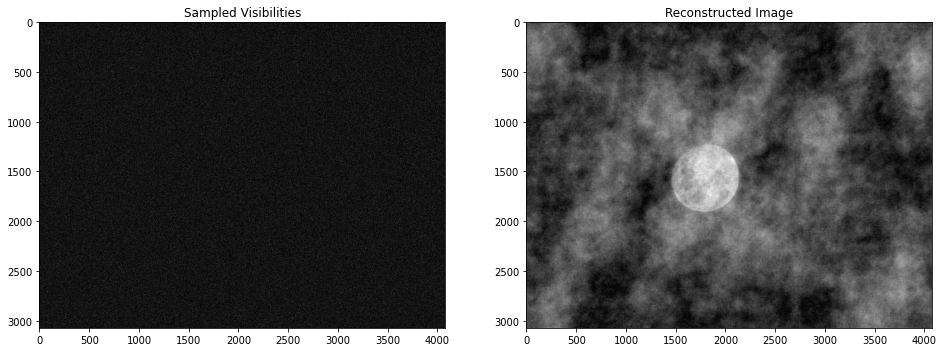

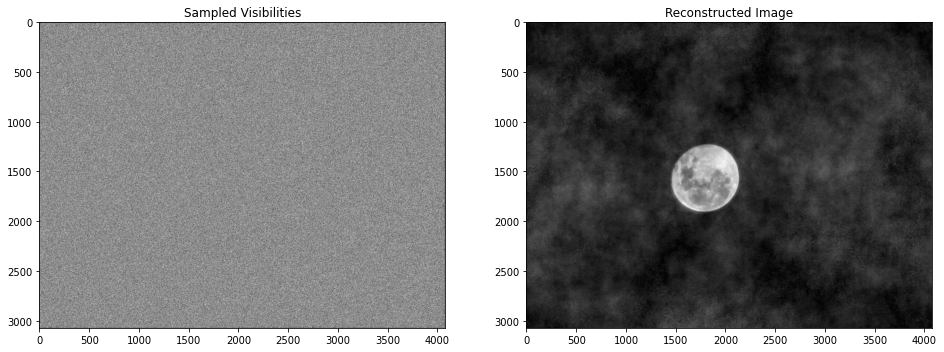

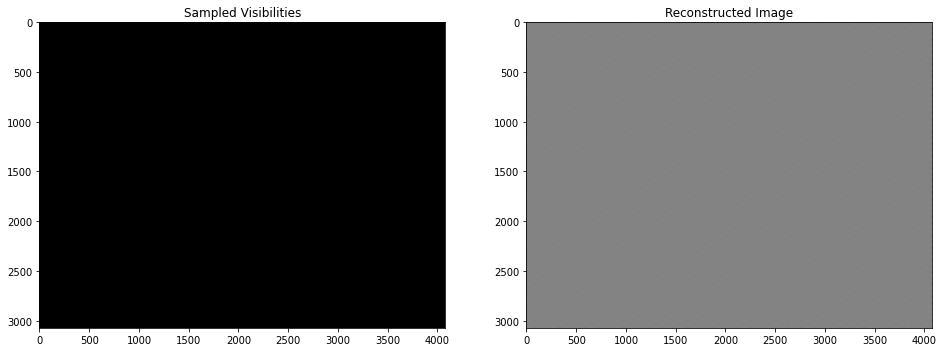

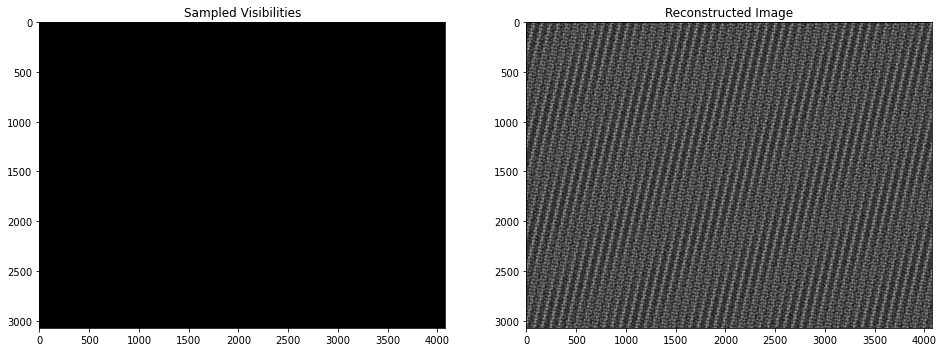

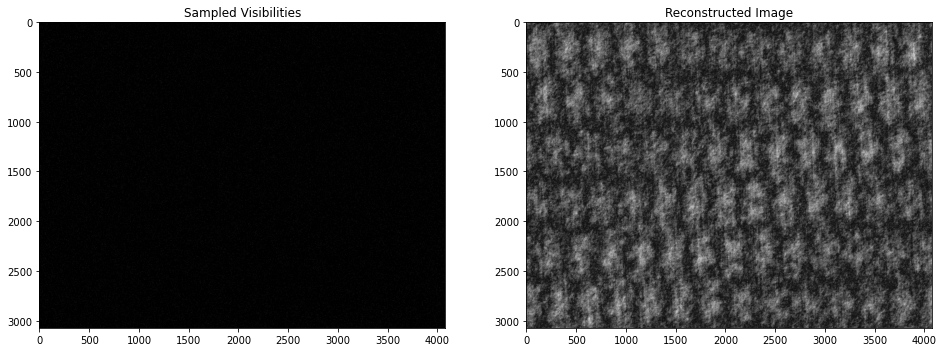

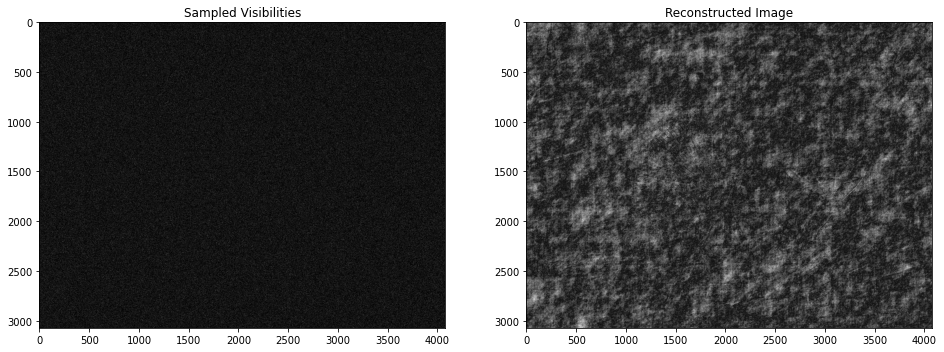

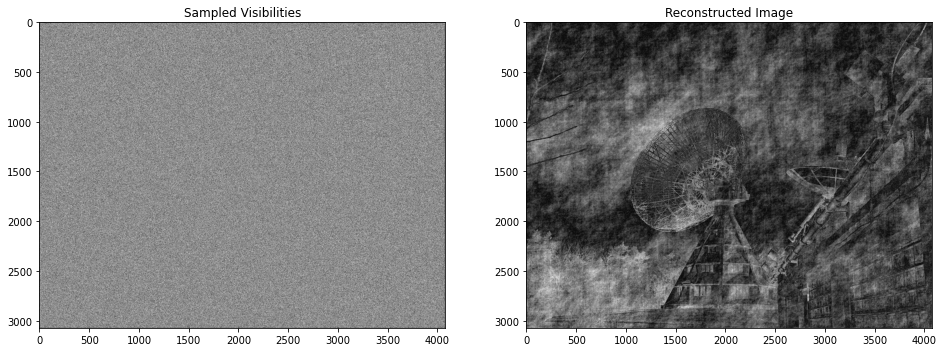

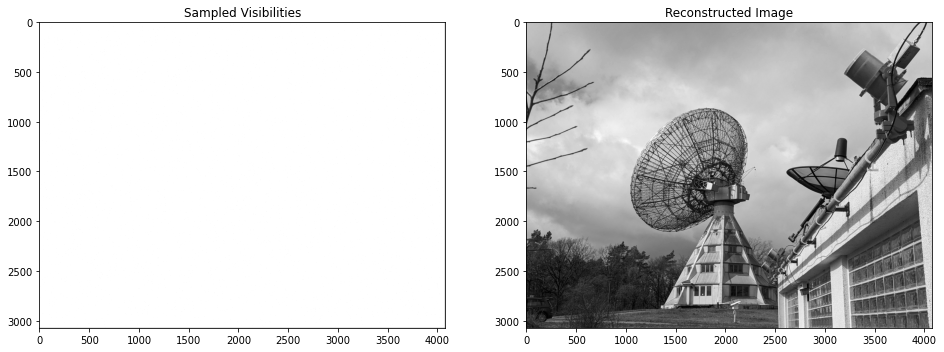

In [2]:
def SampleVisibilities(vis, nsamples):
    """
    vis: fftimage
    nsamples: number of pixels sampled
    sample visibilities from fft image and perform inverse fft
    plot samplet visibilities and reconstructed image
    """
    sampled_visibilities = np.zeros_like(vis) # empty array
    ypos = np.random.randint(0, vis.shape[0]-1, size=nsamples)
    xpos = np.random.randint(0, vis.shape[1]-1, size=nsamples)
    sampled_visibilities[ypos, xpos] = vis[ypos, xpos] #insert sampled visibilities
    InvFFT = np.abs(np.fft.ifft2(np.fft.fftshift(sampled_visibilities)))
    
    fig, axes = plt.subplots(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.title('Sampled Visibilities')
    plt.imshow(np.abs(sampled_visibilities).astype(bool))
    plt.set_cmap('gray')
    
    plt.subplot(1,2,2)
    plt.title('Reconstructed Image')
    plt.imshow(InvFFT)
    plt.set_cmap('gray')
    

SampleVisibilities(fftmoon, int(1e1))

SampleVisibilities(fftmoon, int(1e3))

SampleVisibilities(fftmoon, int(1e5))

SampleVisibilities(fftmoon, int(1e6))

SampleVisibilities(fftmoon, int(1e7))

SampleVisibilities(fftastro, int(1e1))

SampleVisibilities(fftastro, int(1e3))

SampleVisibilities(fftastro, int(1e5))

SampleVisibilities(fftastro, int(1e6))

SampleVisibilities(fftastro, int(1e7))

SampleVisibilities(fftastro, int(1e8))